<h1>Experiment with beer1pos</h1>

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import os
import sys
basedir = '/home/joewandy/git/metabolomics_tools'
sys.path.append(basedir)

In [18]:
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import display, HTML

import cPickle
import random
import copy
import glob
import gzip

In [19]:
from alignment.models import HyperPars as AlignmentHyperPars
from alignment.experiment import *

<h2>Experiment Parameters</h2>

Set up all the experiment parameters

In [20]:
input_dir = '/home/joewandy/git/metabolomics_tools/alignment/input/beer1pos'
transformation_file = '/home/joewandy/git/metabolomics_tools/alignment/pos_transformations_full.yml'
gt_file = '/home/joewandy/git/metabolomics_tools/alignment/input/beer1pos/ground_truth/beer1.positive.dat'

In [21]:
hp = AlignmentHyperPars()    
hp.within_file_mass_tol = 3
hp.within_file_rt_tol = 5
hp.across_file_mass_tol = 6
hp.across_file_rt_tol = 30
hp.alpha_mass = 1
hp.dp_alpha = 1000.0
hp.beta = 0.1
hp.t = 0.0
hp.mass_clustering_n_iterations = 400
hp.rt_clustering_nsamps = 200
hp.rt_clustering_burnin = 0

print hp

Hyperparameters across_file_mass_tol=6, across_file_rt_tol=30, alpha_mass=1, beta=0.1, dp_alpha=1000.0, mass_clustering_n_iterations=400, matching_alpha=0.3, rt_clustering_burnin=0, rt_clustering_nsamps=200, t=0.0, within_file_mass_tol=3, within_file_rt_tol=5


In [22]:
evaluation_method = 2
n_iter = 1

In [23]:
param_list = []
for mass_tol in range(2, 7, 2):
    for rt_tol in range(5, 31, 5):
        param_list.append((mass_tol, rt_tol))

In [24]:
param_list_mwg = []
for mass_tol in range(2, 7, 2):
    for rt_tol in range(5, 31, 5):
        for group_tol in range(2, 11, 2):
            for alpha in range(0, 11, 2):
                param_list_mwg.append((mass_tol, rt_tol, group_tol, alpha/10.0))

<h2>Create the first-stage clustering for all input files -- Gibbs, mh_biggest=True</h2>

In [25]:
combined_list = load_or_create_clustering('pickles/beer1pos/clustering.p', input_dir, transformation_file, hp)

6733 features read from beer1-file1.csv
7586 features read from beer1-file2.csv
6823 features read from beer1-file3.csv


[Parallel(n_jobs=4)]: Done   1 out of   3 | elapsed:  6.0min remaining: 11.9min
[Parallel(n_jobs=4)]: Done   2 out of   3 | elapsed:  7.4min remaining:  3.7min
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:  7.4min finished


Saved to pickles/beer1pos/clustering.p
Created 6733 clusters
Created 7586 clusters
Created 6823 clusters
Binning with mh_biggest = True
Binning with mh_biggest = True
Binning with mh_biggest = True
Assigning possible transformations 0/6733
Assigning possible transformations 0/7586
Assigning possible transformations 0/6823
Assigning possible transformations 500/6733
Assigning possible transformations 500/7586
Assigning possible transformations 500/6823
Assigning possible transformations 1000/6733
Assigning possible transformations 1000/7586
Assigning possible transformations 1000/6823
Assigning possible transformations 1500/6733
Assigning possible transformations 1500/7586
Assigning possible transformations 1500/6823
Assigning possible transformations 2000/6733
Assigning possible transformations 2000/7586
Assigning possible transformations 2000/6823
Assigning possible transformations 2500/6733
Assigning possible transformations 2500/7586
Assigning possible transformations 2500/6823
Assi

<h2>Run experiment with beer1pos</h2>

In [26]:
n_files = 3

In [27]:
training_list = load_or_create_filelist('pickles/beer1pos/training_list.p', combined_list, n_iter, n_files)

['beer1-file1.csv', 'beer1-file3.csv', 'beer1-file2.csv']
Saved to pickles/beer1pos/training_list.p


In [28]:
testing_list = load_or_create_filelist('pickles/beer1pos/testing_list.p', combined_list, n_iter, n_files)

['beer1-file2.csv', 'beer1-file3.csv', 'beer1-file1.csv']
Saved to pickles/beer1pos/testing_list.p


In [29]:
exp_results_1a = run_experiment(0, training_list, testing_list, param_list, 'pickles/beer1pos/res_match_feature.p', hp, evaluation_method, transformation_file, gt_file)

Iteration 0
Training on ['beer1-file1.csv', 'beer1-file3.csv', 'beer1-file2.csv']
mass_tol=2, rt_tol=5, tp=233, fp=20, fn=44, prec=0.921, rec=0.841, f1=0.879, th_prob=1.000
mass_tol=2, rt_tol=10, tp=251, fp=23, fn=26, prec=0.916, rec=0.906, f1=0.911, th_prob=1.000
mass_tol=2, rt_tol=15, tp=258, fp=26, fn=19, prec=0.908, rec=0.931, f1=0.920, th_prob=1.000
mass_tol=2, rt_tol=20, tp=261, fp=26, fn=16, prec=0.909, rec=0.942, f1=0.926, th_prob=1.000
mass_tol=2, rt_tol=25, tp=261, fp=26, fn=16, prec=0.909, rec=0.942, f1=0.926, th_prob=1.000
mass_tol=2, rt_tol=30, tp=262, fp=26, fn=15, prec=0.910, rec=0.946, f1=0.927, th_prob=1.000
mass_tol=4, rt_tol=5, tp=233, fp=20, fn=44, prec=0.921, rec=0.841, f1=0.879, th_prob=1.000
mass_tol=4, rt_tol=10, tp=251, fp=23, fn=26, prec=0.916, rec=0.906, f1=0.911, th_prob=1.000
mass_tol=4, rt_tol=15, tp=258, fp=26, fn=19, prec=0.908, rec=0.931, f1=0.920, th_prob=1.000
mass_tol=4, rt_tol=20, tp=261, fp=26, fn=16, prec=0.909, rec=0.942, f1=0.926, th_prob=1.000


In [30]:
exp_results_1b = run_experiment(1, training_list, testing_list, param_list, 'pickles/beer1pos/res_match_cluster.p', hp, evaluation_method, transformation_file, gt_file)

Iteration 0
Training on ['beer1-file1.csv', 'beer1-file3.csv', 'beer1-file2.csv']
mass_tol=2, rt_tol=5, tp=232, fp=16, fn=45, prec=0.935, rec=0.838, f1=0.884, th_prob=1.000
mass_tol=2, rt_tol=10, tp=247, fp=19, fn=30, prec=0.929, rec=0.892, f1=0.910, th_prob=1.000
mass_tol=2, rt_tol=15, tp=252, fp=23, fn=25, prec=0.916, rec=0.910, f1=0.913, th_prob=1.000
mass_tol=2, rt_tol=20, tp=255, fp=23, fn=22, prec=0.917, rec=0.921, f1=0.919, th_prob=1.000
mass_tol=2, rt_tol=25, tp=255, fp=23, fn=22, prec=0.917, rec=0.921, f1=0.919, th_prob=1.000
mass_tol=2, rt_tol=30, tp=256, fp=23, fn=21, prec=0.918, rec=0.924, f1=0.921, th_prob=1.000
mass_tol=4, rt_tol=5, tp=232, fp=16, fn=45, prec=0.935, rec=0.838, f1=0.884, th_prob=1.000
mass_tol=4, rt_tol=10, tp=247, fp=19, fn=30, prec=0.929, rec=0.892, f1=0.910, th_prob=1.000
mass_tol=4, rt_tol=15, tp=252, fp=23, fn=25, prec=0.916, rec=0.910, f1=0.913, th_prob=1.000
mass_tol=4, rt_tol=20, tp=255, fp=23, fn=22, prec=0.917, rec=0.921, f1=0.919, th_prob=1.000


In [31]:
exp_results_1c = run_experiment(3, training_list, testing_list, param_list, 'pickles/beer1pos/res_mwg.p', hp, evaluation_method, transformation_file, gt_file)

Iteration 0
Training on ['beer1-file1.csv', 'beer1-file3.csv', 'beer1-file2.csv']
mass_tol=2, rt_tol=5, tp=231, fp=22, fn=46, prec=0.913, rec=0.834, f1=0.872, th_prob=1.000
mass_tol=2, rt_tol=10, tp=252, fp=23, fn=25, prec=0.916, rec=0.910, f1=0.913, th_prob=1.000
mass_tol=2, rt_tol=15, tp=260, fp=26, fn=17, prec=0.909, rec=0.939, f1=0.924, th_prob=1.000
mass_tol=2, rt_tol=20, tp=263, fp=26, fn=14, prec=0.910, rec=0.949, f1=0.929, th_prob=1.000
mass_tol=2, rt_tol=25, tp=263, fp=26, fn=14, prec=0.910, rec=0.949, f1=0.929, th_prob=1.000
mass_tol=2, rt_tol=30, tp=264, fp=26, fn=13, prec=0.910, rec=0.953, f1=0.931, th_prob=1.000
mass_tol=4, rt_tol=5, tp=231, fp=22, fn=46, prec=0.913, rec=0.834, f1=0.872, th_prob=1.000
mass_tol=4, rt_tol=10, tp=252, fp=23, fn=25, prec=0.916, rec=0.910, f1=0.913, th_prob=1.000
mass_tol=4, rt_tol=15, tp=260, fp=26, fn=17, prec=0.909, rec=0.939, f1=0.924, th_prob=1.000
mass_tol=4, rt_tol=20, tp=263, fp=26, fn=14, prec=0.910, rec=0.949, f1=0.929, th_prob=1.000


In [32]:
def second_stage_clustering(training_list, i):

    training_data = training_list[i]
    print "Iteration %d" % i
    print "Training on %s" % [x[0].filename for x in training_data]

    param = (hp.across_file_mass_tol, hp.across_file_rt_tol )
    selected_files = [x[0] for x in training_data]  
    selected_clusterings = [x[1] for x in training_data]            
    aligner = Aligner(selected_files, None, transformation_file, 
                           hp, verbose=False, seed=1234567890, parallel=False)
    match_mode = 2
    aligner.run(match_mode, first_stage_clustering_results=selected_clusterings)

    res = aligner.evaluate_performance(gt_file, verbose=False, print_TP=True, method=evaluation_method)
    performances = []
    for r in res:
        performances.append(param+r)
    df = pd.DataFrame(performances, columns=['mass_tol', 'rt_tol', 'TP', 'FP', 'FN', 'Prec', 'Rec', 'F1', 'Threshold'])
    return df

In [33]:
df1 = second_stage_clustering(training_list, 0)

Iteration 0
Training on ['beer1-file1.csv', 'beer1-file3.csv', 'beer1-file2.csv']
n 0	cluster_list=1	last_K = 1
n 1	cluster_list=7	last_K = 3


[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 jobs       | elapsed:    0.5s


n 2	cluster_list=1	last_K = 1
n 3	cluster_list=3	last_K = 2
n 4	cluster_list=6	last_K = 2
n 5	cluster_list=3	last_K = 1
n 6	cluster_list=3	last_K = 1
n 7	cluster_list=1	last_K = 1


[Parallel(n_jobs=1)]: Done   5 jobs       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done   8 jobs       | elapsed:    1.2s


n 8	cluster_list=1	last_K = 1
n 9	cluster_list=1	last_K = 1
n 10	cluster_list=15	last_K = 12
n 11	cluster_list=6	last_K = 3
n 12	cluster_list=1	last_K = 1
n 13	cluster_list=7	last_K = 3
n 14	cluster_list=1	last_K = 1
n 15	cluster_list=1	last_K = 1
n 16	cluster_list=2	last_K = 1
n 17	cluster_list=4	last_K = 3


[Parallel(n_jobs=1)]: Done  13 jobs       | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done  18 jobs       | elapsed:    4.2s


n 18	cluster_list=5	last_K = 2
n 19	cluster_list=1	last_K = 1
n 20	cluster_list=2	last_K = 1
n 21	cluster_list=2	last_K = 1
n 22	cluster_list=2	last_K = 2
n 23	cluster_list=14	last_K = 6
n 24	cluster_list=1	last_K = 1
n 25	cluster_list=3	last_K = 3
n 26	cluster_list=2	last_K = 2
n 27	cluster_list=18	last_K = 7
n 28	cluster_list=18	last_K = 11
n 29	cluster_list=17	last_K = 17
n 30	cluster_list=12	last_K = 6
n 31	cluster_list=1	last_K = 1


[Parallel(n_jobs=1)]: Done  25 jobs       | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done  32 jobs       | elapsed:   13.9s


n 32	cluster_list=2	last_K = 1
n 33	cluster_list=3	last_K = 3
n 34	cluster_list=8	last_K = 4
n 35	cluster_list=3	last_K = 1
n 36	cluster_list=1	last_K = 1
n 37	cluster_list=4	last_K = 2
n 38	cluster_list=2	last_K = 1
n 39	cluster_list=12	last_K = 7
n 40	cluster_list=1	last_K = 1
n 41	cluster_list=1	last_K = 1
n 42	cluster_list=5	last_K = 2
n 43	cluster_list=1	last_K = 1
n 44	cluster_list=15	last_K = 9
n 45	cluster_list=1	last_K = 1
n 46	cluster_list=3	last_K = 1
n 47	cluster_list=2	last_K = 2
n 48	cluster_list=2	last_K = 2
n 49	cluster_list=4	last_K = 2


[Parallel(n_jobs=1)]: Done  41 jobs       | elapsed:   16.1s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:   18.5s


n 50	cluster_list=7	last_K = 4
n 51	cluster_list=1	last_K = 1
n 52	cluster_list=4	last_K = 2
n 53	cluster_list=2	last_K = 1
n 54	cluster_list=11	last_K = 5
n 55	cluster_list=2	last_K = 2
n 56	cluster_list=4	last_K = 4
n 57	cluster_list=2	last_K = 2
n 58	cluster_list=5	last_K = 3
n 59	cluster_list=3	last_K = 1
n 60	cluster_list=4	last_K = 3
n 61	cluster_list=14	last_K = 13
n 62	cluster_list=9	last_K = 4
n 63	cluster_list=1	last_K = 1
n 64	cluster_list=3	last_K = 1
n 65	cluster_list=1	last_K = 1
n 66	cluster_list=3	last_K = 1
n 67	cluster_list=3	last_K = 2
n 68	cluster_list=3	last_K = 1
n 69	cluster_list=3	last_K = 1
n 70	cluster_list=1	last_K = 1
n 71	cluster_list=5	last_K = 2


[Parallel(n_jobs=1)]: Done  61 jobs       | elapsed:   21.4s
[Parallel(n_jobs=1)]: Done  72 jobs       | elapsed:   24.7s


n 72	cluster_list=5	last_K = 3
n 73	cluster_list=1	last_K = 1
n 74	cluster_list=3	last_K = 1
n 75	cluster_list=17	last_K = 8
n 76	cluster_list=7	last_K = 5
n 77	cluster_list=5	last_K = 2
n 78	cluster_list=1	last_K = 1
n 79	cluster_list=2	last_K = 2
n 80	cluster_list=1	last_K = 1
n 81	cluster_list=9	last_K = 4
n 82	cluster_list=18	last_K = 8
n 83	cluster_list=11	last_K = 6
n 84	cluster_list=14	last_K = 10
n 85	cluster_list=1	last_K = 1
n 86	cluster_list=10	last_K = 5
n 87	cluster_list=2	last_K = 2
n 88	cluster_list=3	last_K = 1
n 89	cluster_list=6	last_K = 3
n 90	cluster_list=26	last_K = 23
n 91	cluster_list=3	last_K = 3
n 92	cluster_list=12	last_K = 4
n 93	cluster_list=6	last_K = 5
n 94	cluster_list=5	last_K = 2
n 95	cluster_list=16	last_K = 6
n 96	cluster_list=3	last_K = 1
n 97	cluster_list=2	last_K = 1


[Parallel(n_jobs=1)]: Done  85 jobs       | elapsed:   32.2s
[Parallel(n_jobs=1)]: Done  98 jobs       | elapsed:   41.7s


n 98	cluster_list=1	last_K = 1
n 99	cluster_list=11	last_K = 10
n 100	cluster_list=7	last_K = 3
n 101	cluster_list=5	last_K = 3
n 102	cluster_list=5	last_K = 3
n 103	cluster_list=1	last_K = 1
n 104	cluster_list=3	last_K = 1
n 105	cluster_list=5	last_K = 4
n 106	cluster_list=4	last_K = 3
n 107	cluster_list=4	last_K = 2
n 108	cluster_list=1	last_K = 1
n 109	cluster_list=1	last_K = 1
n 110	cluster_list=3	last_K = 1
n 111	cluster_list=3	last_K = 1
n 112	cluster_list=24	last_K = 15
n 113	cluster_list=1	last_K = 1
n 114	cluster_list=5	last_K = 5
n 115	cluster_list=1	last_K = 1
n 116	cluster_list=2	last_K = 1
n 117	cluster_list=3	last_K = 1
n 118	cluster_list=4	last_K = 3
n 119	cluster_list=1	last_K = 1
n 120	cluster_list=3	last_K = 2
n 121	cluster_list=3	last_K = 2
n 122	cluster_list=2	last_K = 2
n 123	cluster_list=14	last_K = 6
n 124	cluster_list=23	last_K = 9
n 125	cluster_list=7	last_K = 3
n 126	cluster_list=1	last_K = 1
n 127	cluster_list=3	last_K = 3


[Parallel(n_jobs=1)]: Done 113 jobs       | elapsed:   48.2s
[Parallel(n_jobs=1)]: Done 128 jobs       | elapsed:   53.5s


n 128	cluster_list=5	last_K = 3
n 129	cluster_list=1	last_K = 1
n 130	cluster_list=1	last_K = 1
n 131	cluster_list=5	last_K = 2
n 132	cluster_list=11	last_K = 5
n 133	cluster_list=3	last_K = 3
n 134	cluster_list=5	last_K = 3
n 135	cluster_list=2	last_K = 2
n 136	cluster_list=7	last_K = 3
n 137	cluster_list=3	last_K = 1
n 138	cluster_list=19	last_K = 13
n 139	cluster_list=7	last_K = 3
n 140	cluster_list=2	last_K = 1
n 141	cluster_list=6	last_K = 2
n 142	cluster_list=5	last_K = 3
n 143	cluster_list=4	last_K = 2
n 144	cluster_list=2	last_K = 1
n 145	cluster_list=1	last_K = 1
n 146	cluster_list=6	last_K = 3
n 147	cluster_list=3	last_K = 2
n 148	cluster_list=9	last_K = 5
n 149	cluster_list=4	last_K = 2
n 150	cluster_list=2	last_K = 1
n 151	cluster_list=9	last_K = 4
n 152	cluster_list=1	last_K = 1
n 153	cluster_list=3	last_K = 1
n 154	cluster_list=3	last_K = 2
n 155	cluster_list=1	last_K = 1
n 156	cluster_list=9	last_K = 5
n 157	cluster_list=3	last_K = 2
n 158	cluster_list=1	last_K = 1
n 159

[Parallel(n_jobs=1)]: Done 145 jobs       | elapsed:   59.9s
[Parallel(n_jobs=1)]: Done 162 jobs       | elapsed:  1.1min


n 162	cluster_list=16	last_K = 6
n 163	cluster_list=3	last_K = 1
n 164	cluster_list=3	last_K = 1
n 165	cluster_list=3	last_K = 1
n 166	cluster_list=18	last_K = 7
n 167	cluster_list=1	last_K = 1
n 168	cluster_list=10	last_K = 6
n 169	cluster_list=13	last_K = 5
n 170	cluster_list=14	last_K = 10
n 171	cluster_list=2	last_K = 2
n 172	cluster_list=1	last_K = 1
n 173	cluster_list=6	last_K = 4
n 174	cluster_list=13	last_K = 7
n 175	cluster_list=9	last_K = 3
n 176	cluster_list=2	last_K = 2
n 177	cluster_list=6	last_K = 4
n 178	cluster_list=12	last_K = 12
n 179	cluster_list=37	last_K = 16
n 180	cluster_list=5	last_K = 3
n 181	cluster_list=6	last_K = 3
n 182	cluster_list=8	last_K = 3
n 183	cluster_list=4	last_K = 2
n 184	cluster_list=6	last_K = 2
n 185	cluster_list=11	last_K = 8
n 186	cluster_list=8	last_K = 6
n 187	cluster_list=5	last_K = 3
n 188	cluster_list=1	last_K = 1
n 189	cluster_list=1	last_K = 1
n 190	cluster_list=1	last_K = 1
n 191	cluster_list=1	last_K = 1
n 192	cluster_list=3	last_K 

[Parallel(n_jobs=1)]: Done 181 jobs       | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done 200 jobs       | elapsed:  1.6min


n 200	cluster_list=1	last_K = 1
n 201	cluster_list=4	last_K = 2
n 202	cluster_list=9	last_K = 7
n 203	cluster_list=6	last_K = 4
n 204	cluster_list=3	last_K = 1
n 205	cluster_list=1	last_K = 1
n 206	cluster_list=1	last_K = 1
n 207	cluster_list=21	last_K = 19
n 208	cluster_list=1	last_K = 1
n 209	cluster_list=8	last_K = 4
n 210	cluster_list=5	last_K = 4
n 211	cluster_list=1	last_K = 1
n 212	cluster_list=1	last_K = 1
n 213	cluster_list=2	last_K = 2
n 214	cluster_list=6	last_K = 3
n 215	cluster_list=9	last_K = 3
n 216	cluster_list=1	last_K = 1
n 217	cluster_list=3	last_K = 1
n 218	cluster_list=1	last_K = 1
n 219	cluster_list=1	last_K = 1
n 220	cluster_list=15	last_K = 6
n 221	cluster_list=1	last_K = 1
n 222	cluster_list=3	last_K = 1
n 223	cluster_list=1	last_K = 1
n 224	cluster_list=20	last_K = 17
n 225	cluster_list=4	last_K = 4
n 226	cluster_list=3	last_K = 1
n 227	cluster_list=2	last_K = 2
n 228	cluster_list=6	last_K = 4
n 229	cluster_list=5	last_K = 3
n 230	cluster_list=1	last_K = 1
n 2

[Parallel(n_jobs=1)]: Done 221 jobs       | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done 242 jobs       | elapsed:  2.0min


n 242	cluster_list=2	last_K = 1
n 243	cluster_list=5	last_K = 2
n 244	cluster_list=5	last_K = 3
n 245	cluster_list=3	last_K = 2
n 246	cluster_list=3	last_K = 1
n 247	cluster_list=15	last_K = 6
n 248	cluster_list=1	last_K = 1
n 249	cluster_list=3	last_K = 1
n 250	cluster_list=1	last_K = 1
n 251	cluster_list=11	last_K = 4
n 252	cluster_list=10	last_K = 4
n 253	cluster_list=1	last_K = 1
n 254	cluster_list=3	last_K = 1
n 255	cluster_list=6	last_K = 2
n 256	cluster_list=3	last_K = 3
n 257	cluster_list=2	last_K = 1
n 258	cluster_list=2	last_K = 1
n 259	cluster_list=49	last_K = 20
n 260	cluster_list=2	last_K = 2
n 261	cluster_list=2	last_K = 1
n 262	cluster_list=20	last_K = 15
n 263	cluster_list=4	last_K = 3
n 264	cluster_list=4	last_K = 2
n 265	cluster_list=2	last_K = 1
n 266	cluster_list=1	last_K = 1
n 267	cluster_list=1	last_K = 1
n 268	cluster_list=2	last_K = 2
n 269	cluster_list=8	last_K = 3
n 270	cluster_list=4	last_K = 3
n 271	cluster_list=1	last_K = 1
n 272	cluster_list=5	last_K = 4
n

[Parallel(n_jobs=1)]: Done 265 jobs       | elapsed:  2.3min
[Parallel(n_jobs=1)]: Done 288 jobs       | elapsed:  2.4min


n 288	cluster_list=3	last_K = 1
n 289	cluster_list=1	last_K = 1
n 290	cluster_list=10	last_K = 7
n 291	cluster_list=2	last_K = 2
n 292	cluster_list=3	last_K = 1
n 293	cluster_list=11	last_K = 5
n 294	cluster_list=6	last_K = 6
n 295	cluster_list=8	last_K = 5
n 296	cluster_list=1	last_K = 1
n 297	cluster_list=2	last_K = 1
n 298	cluster_list=2	last_K = 1
n 299	cluster_list=3	last_K = 1
n 300	cluster_list=4	last_K = 2
n 301	cluster_list=17	last_K = 6
n 302	cluster_list=3	last_K = 1
n 303	cluster_list=3	last_K = 1
n 304	cluster_list=1	last_K = 1
n 305	cluster_list=2	last_K = 1
n 306	cluster_list=1	last_K = 1
n 307	cluster_list=4	last_K = 2
n 308	cluster_list=1	last_K = 1
n 309	cluster_list=3	last_K = 1
n 310	cluster_list=6	last_K = 2
n 311	cluster_list=1	last_K = 1
n 312	cluster_list=1	last_K = 1
n 313	cluster_list=3	last_K = 2
n 314	cluster_list=6	last_K = 2
n 315	cluster_list=6	last_K = 2
n 316	cluster_list=9	last_K = 9
n 317	cluster_list=3	last_K = 2
n 318	cluster_list=3	last_K = 1
n 319

[Parallel(n_jobs=1)]: Done 313 jobs       | elapsed:  2.5min
[Parallel(n_jobs=1)]: Done 338 jobs       | elapsed:  2.6min


n 338	cluster_list=22	last_K = 13
n 339	cluster_list=16	last_K = 9
n 340	cluster_list=1	last_K = 1
n 341	cluster_list=7	last_K = 4
n 342	cluster_list=4	last_K = 2
n 343	cluster_list=13	last_K = 6
n 344	cluster_list=23	last_K = 15
n 345	cluster_list=5	last_K = 2
n 346	cluster_list=1	last_K = 1
n 347	cluster_list=2	last_K = 1
n 348	cluster_list=4	last_K = 2
n 349	cluster_list=1	last_K = 1
n 350	cluster_list=8	last_K = 6
n 351	cluster_list=1	last_K = 1
n 352	cluster_list=1	last_K = 1
n 353	cluster_list=2	last_K = 1
n 354	cluster_list=2	last_K = 2
n 355	cluster_list=3	last_K = 1
n 356	cluster_list=13	last_K = 6
n 357	cluster_list=3	last_K = 1
n 358	cluster_list=3	last_K = 1
n 359	cluster_list=3	last_K = 1
n 360	cluster_list=8	last_K = 5
n 361	cluster_list=3	last_K = 1
n 362	cluster_list=23	last_K = 11
n 363	cluster_list=8	last_K = 4
n 364	cluster_list=19	last_K = 18
n 365	cluster_list=2	last_K = 2
n 366	cluster_list=16	last_K = 14
n 367	cluster_list=2	last_K = 1
n 368	cluster_list=1	last_K

[Parallel(n_jobs=1)]: Done 365 jobs       | elapsed:  2.9min
[Parallel(n_jobs=1)]: Done 392 jobs       | elapsed:  3.1min


n 392	cluster_list=3	last_K = 1
n 393	cluster_list=13	last_K = 6
n 394	cluster_list=1	last_K = 1
n 395	cluster_list=4	last_K = 2
n 396	cluster_list=3	last_K = 1
n 397	cluster_list=2	last_K = 1
n 398	cluster_list=14	last_K = 5
n 399	cluster_list=7	last_K = 5
n 400	cluster_list=3	last_K = 1
n 401	cluster_list=20	last_K = 20
n 402	cluster_list=3	last_K = 1
n 403	cluster_list=9	last_K = 5
n 404	cluster_list=2	last_K = 1
n 405	cluster_list=10	last_K = 4
n 406	cluster_list=3	last_K = 1
n 407	cluster_list=1	last_K = 1
n 408	cluster_list=6	last_K = 5
n 409	cluster_list=7	last_K = 5
n 410	cluster_list=1	last_K = 1
n 411	cluster_list=5	last_K = 3
n 412	cluster_list=1	last_K = 1
n 413	cluster_list=2	last_K = 2
n 414	cluster_list=9	last_K = 3
n 415	cluster_list=1	last_K = 1
n 416	cluster_list=4	last_K = 2
n 417	cluster_list=1	last_K = 1
n 418	cluster_list=3	last_K = 1
n 419	cluster_list=3	last_K = 2
n 420	cluster_list=2	last_K = 1
n 421	cluster_list=3	last_K = 1
n 422	cluster_list=1	last_K = 1
n 4

[Parallel(n_jobs=1)]: Done 421 jobs       | elapsed:  3.3min
[Parallel(n_jobs=1)]: Done 450 jobs       | elapsed:  3.5min


n 450	cluster_list=3	last_K = 2
n 451	cluster_list=14	last_K = 8
n 452	cluster_list=6	last_K = 3
n 453	cluster_list=12	last_K = 11
n 454	cluster_list=3	last_K = 1
n 455	cluster_list=3	last_K = 3
n 456	cluster_list=2	last_K = 1
n 457	cluster_list=8	last_K = 4
n 458	cluster_list=11	last_K = 6
n 459	cluster_list=1	last_K = 1
n 460	cluster_list=3	last_K = 1
n 461	cluster_list=3	last_K = 1
n 462	cluster_list=2	last_K = 2
n 463	cluster_list=1	last_K = 1
n 464	cluster_list=5	last_K = 3
n 465	cluster_list=1	last_K = 1
n 466	cluster_list=2	last_K = 1
n 467	cluster_list=1	last_K = 1
n 468	cluster_list=12	last_K = 5
n 469	cluster_list=6	last_K = 4
n 470	cluster_list=1	last_K = 1
n 471	cluster_list=3	last_K = 3
n 472	cluster_list=12	last_K = 5
n 473	cluster_list=1	last_K = 1
n 474	cluster_list=1	last_K = 1
n 475	cluster_list=17	last_K = 8
n 476	cluster_list=1	last_K = 1
n 477	cluster_list=1	last_K = 1
n 478	cluster_list=1	last_K = 1
n 479	cluster_list=5	last_K = 2
n 480	cluster_list=3	last_K = 1
n

[Parallel(n_jobs=1)]: Done 481 jobs       | elapsed:  3.6min
[Parallel(n_jobs=1)]: Done 512 jobs       | elapsed:  3.9min


n 512	cluster_list=6	last_K = 2
n 513	cluster_list=4	last_K = 3
n 514	cluster_list=1	last_K = 1
n 515	cluster_list=1	last_K = 1
n 516	cluster_list=8	last_K = 5
n 517	cluster_list=3	last_K = 2
n 518	cluster_list=10	last_K = 5
n 519	cluster_list=5	last_K = 3
n 520	cluster_list=1	last_K = 1
n 521	cluster_list=1	last_K = 1
n 522	cluster_list=3	last_K = 1
n 523	cluster_list=5	last_K = 3
n 524	cluster_list=5	last_K = 3
n 525	cluster_list=2	last_K = 2
n 526	cluster_list=3	last_K = 1
n 527	cluster_list=1	last_K = 1
n 528	cluster_list=4	last_K = 3
n 529	cluster_list=3	last_K = 2
n 530	cluster_list=8	last_K = 4
n 531	cluster_list=3	last_K = 1
n 532	cluster_list=1	last_K = 1
n 533	cluster_list=6	last_K = 3
n 534	cluster_list=1	last_K = 1
n 535	cluster_list=4	last_K = 3
n 536	cluster_list=3	last_K = 2
n 537	cluster_list=1	last_K = 1
n 538	cluster_list=8	last_K = 5
n 539	cluster_list=30	last_K = 13
n 540	cluster_list=3	last_K = 1
n 541	cluster_list=22	last_K = 9
n 542	cluster_list=5	last_K = 2
n 54

[Parallel(n_jobs=1)]: Done 545 jobs       | elapsed:  4.1min
[Parallel(n_jobs=1)]: Done 578 jobs       | elapsed:  4.5min


n 578	cluster_list=5	last_K = 4
n 579	cluster_list=16	last_K = 15
n 580	cluster_list=2	last_K = 2
n 581	cluster_list=9	last_K = 5
n 582	cluster_list=3	last_K = 1
n 583	cluster_list=5	last_K = 2
n 584	cluster_list=5	last_K = 4
n 585	cluster_list=2	last_K = 1
n 586	cluster_list=12	last_K = 6
n 587	cluster_list=6	last_K = 2
n 588	cluster_list=1	last_K = 1
n 589	cluster_list=5	last_K = 3
n 590	cluster_list=3	last_K = 1
n 591	cluster_list=1	last_K = 1
n 592	cluster_list=3	last_K = 1
n 593	cluster_list=9	last_K = 4
n 594	cluster_list=2	last_K = 1
n 595	cluster_list=2	last_K = 1
n 596	cluster_list=17	last_K = 8
n 597	cluster_list=5	last_K = 4
n 598	cluster_list=1	last_K = 1
n 599	cluster_list=1	last_K = 1
n 600	cluster_list=20	last_K = 13
n 601	cluster_list=3	last_K = 1
n 602	cluster_list=8	last_K = 6
n 603	cluster_list=3	last_K = 3
n 604	cluster_list=11	last_K = 6
n 605	cluster_list=1	last_K = 1
n 606	cluster_list=3	last_K = 1
n 607	cluster_list=8	last_K = 4
n 608	cluster_list=2	last_K = 1
n

[Parallel(n_jobs=1)]: Done 613 jobs       | elapsed:  4.8min
[Parallel(n_jobs=1)]: Done 648 jobs       | elapsed:  4.9min


n 648	cluster_list=1	last_K = 1
n 649	cluster_list=2	last_K = 2
n 650	cluster_list=6	last_K = 4
n 651	cluster_list=3	last_K = 1
n 652	cluster_list=9	last_K = 9
n 653	cluster_list=3	last_K = 1
n 654	cluster_list=1	last_K = 1
n 655	cluster_list=3	last_K = 2
n 656	cluster_list=5	last_K = 3
n 657	cluster_list=3	last_K = 1
n 658	cluster_list=1	last_K = 1
n 659	cluster_list=30	last_K = 19
n 660	cluster_list=1	last_K = 1
n 661	cluster_list=3	last_K = 1
n 662	cluster_list=7	last_K = 3
n 663	cluster_list=1	last_K = 1
n 664	cluster_list=22	last_K = 15
n 665	cluster_list=3	last_K = 1
n 666	cluster_list=1	last_K = 1
n 667	cluster_list=1	last_K = 1
n 668	cluster_list=1	last_K = 1
n 669	cluster_list=21	last_K = 11
n 670	cluster_list=1	last_K = 1
n 671	cluster_list=1	last_K = 1
n 672	cluster_list=1	last_K = 1
n 673	cluster_list=8	last_K = 3
n 674	cluster_list=4	last_K = 2
n 675	cluster_list=4	last_K = 2
n 676	cluster_list=1	last_K = 1
n 677	cluster_list=2	last_K = 1
n 678	cluster_list=9	last_K = 4
n 

[Parallel(n_jobs=1)]: Done 685 jobs       | elapsed:  5.2min
[Parallel(n_jobs=1)]: Done 722 jobs       | elapsed:  5.4min


n 722	cluster_list=4	last_K = 3
n 723	cluster_list=12	last_K = 5
n 724	cluster_list=3	last_K = 2
n 725	cluster_list=4	last_K = 2
n 726	cluster_list=6	last_K = 3
n 727	cluster_list=1	last_K = 1
n 728	cluster_list=6	last_K = 4
n 729	cluster_list=4	last_K = 3
n 730	cluster_list=2	last_K = 1
n 731	cluster_list=4	last_K = 2
n 732	cluster_list=3	last_K = 1
n 733	cluster_list=4	last_K = 2
n 734	cluster_list=3	last_K = 2
n 735	cluster_list=3	last_K = 1
n 736	cluster_list=3	last_K = 2
n 737	cluster_list=1	last_K = 1
n 738	cluster_list=2	last_K = 1
n 739	cluster_list=2	last_K = 1
n 740	cluster_list=6	last_K = 3
n 741	cluster_list=2	last_K = 1
n 742	cluster_list=4	last_K = 3
n 743	cluster_list=3	last_K = 2
n 744	cluster_list=7	last_K = 7
n 745	cluster_list=6	last_K = 2
n 746	cluster_list=1	last_K = 1
n 747	cluster_list=4	last_K = 2
n 748	cluster_list=3	last_K = 1
n 749	cluster_list=2	last_K = 1
n 750	cluster_list=20	last_K = 8
n 751	cluster_list=7	last_K = 3
n 752	cluster_list=1	last_K = 1
n 753	

[Parallel(n_jobs=1)]: Done 761 jobs       | elapsed:  5.6min
[Parallel(n_jobs=1)]: Done 800 jobs       | elapsed:  5.8min


n 800	cluster_list=4	last_K = 3
n 801	cluster_list=1	last_K = 1
n 802	cluster_list=2	last_K = 1
n 803	cluster_list=18	last_K = 8
n 804	cluster_list=1	last_K = 1
n 805	cluster_list=31	last_K = 20
n 806	cluster_list=5	last_K = 2
n 807	cluster_list=13	last_K = 6
n 808	cluster_list=8	last_K = 3
n 809	cluster_list=3	last_K = 2
n 810	cluster_list=1	last_K = 1
n 811	cluster_list=1	last_K = 1
n 812	cluster_list=3	last_K = 2
n 813	cluster_list=14	last_K = 6
n 814	cluster_list=1	last_K = 1
n 815	cluster_list=5	last_K = 2
n 816	cluster_list=4	last_K = 2
n 817	cluster_list=20	last_K = 8
n 818	cluster_list=1	last_K = 1
n 819	cluster_list=1	last_K = 1
n 820	cluster_list=8	last_K = 6
n 821	cluster_list=3	last_K = 1
n 822	cluster_list=4	last_K = 2
n 823	cluster_list=14	last_K = 6
n 824	cluster_list=1	last_K = 1
n 825	cluster_list=1	last_K = 1
n 826	cluster_list=2	last_K = 1
n 827	cluster_list=3	last_K = 1
n 828	cluster_list=1	last_K = 1
n 829	cluster_list=1	last_K = 1
n 830	cluster_list=7	last_K = 3
n

[Parallel(n_jobs=1)]: Done 841 jobs       | elapsed:  6.2min
[Parallel(n_jobs=1)]: Done 882 jobs       | elapsed:  6.3min


n 882	cluster_list=4	last_K = 2
n 883	cluster_list=3	last_K = 1
n 884	cluster_list=1	last_K = 1
n 885	cluster_list=9	last_K = 4
n 886	cluster_list=9	last_K = 5
n 887	cluster_list=3	last_K = 1
n 888	cluster_list=1	last_K = 1
n 889	cluster_list=10	last_K = 5
n 890	cluster_list=3	last_K = 2
n 891	cluster_list=3	last_K = 1
n 892	cluster_list=3	last_K = 1
n 893	cluster_list=12	last_K = 7
n 894	cluster_list=1	last_K = 1
n 895	cluster_list=3	last_K = 1
n 896	cluster_list=3	last_K = 1
n 897	cluster_list=1	last_K = 1
n 898	cluster_list=1	last_K = 1
n 899	cluster_list=14	last_K = 5
n 900	cluster_list=4	last_K = 2
n 901	cluster_list=2	last_K = 1
n 902	cluster_list=1	last_K = 1
n 903	cluster_list=2	last_K = 1
n 904	cluster_list=1	last_K = 1
n 905	cluster_list=4	last_K = 2
n 906	cluster_list=14	last_K = 7
n 907	cluster_list=2	last_K = 1
n 908	cluster_list=1	last_K = 1
n 909	cluster_list=7	last_K = 3
n 910	cluster_list=11	last_K = 5
n 911	cluster_list=4	last_K = 2
n 912	cluster_list=13	last_K = 7
n 

[Parallel(n_jobs=1)]: Done 925 jobs       | elapsed:  6.6min
[Parallel(n_jobs=1)]: Done 968 jobs       | elapsed:  6.7min


n 968	cluster_list=4	last_K = 2
n 969	cluster_list=20	last_K = 10
n 970	cluster_list=4	last_K = 2
n 971	cluster_list=1	last_K = 1
n 972	cluster_list=25	last_K = 12
n 973	cluster_list=6	last_K = 4
n 974	cluster_list=3	last_K = 3
n 975	cluster_list=1	last_K = 1
n 976	cluster_list=1	last_K = 1
n 977	cluster_list=3	last_K = 1
n 978	cluster_list=7	last_K = 3
n 979	cluster_list=1	last_K = 1
n 980	cluster_list=6	last_K = 3
n 981	cluster_list=1	last_K = 1
n 982	cluster_list=3	last_K = 3
n 983	cluster_list=3	last_K = 1
n 984	cluster_list=1	last_K = 1
n 985	cluster_list=3	last_K = 1
n 986	cluster_list=4	last_K = 3
n 987	cluster_list=2	last_K = 1
n 988	cluster_list=3	last_K = 1
n 989	cluster_list=2	last_K = 2
n 990	cluster_list=5	last_K = 2
n 991	cluster_list=3	last_K = 1
n 992	cluster_list=1	last_K = 1
n 993	cluster_list=2	last_K = 2
n 994	cluster_list=4	last_K = 2
n 995	cluster_list=2	last_K = 1
n 996	cluster_list=5	last_K = 3
n 997	cluster_list=2	last_K = 1
n 998	cluster_list=3	last_K = 1
n 99

[Parallel(n_jobs=1)]: Done 1013 jobs       | elapsed:  7.0min
[Parallel(n_jobs=1)]: Done 1058 jobs       | elapsed:  7.2min


n 1058	cluster_list=2	last_K = 1
n 1059	cluster_list=3	last_K = 1
n 1060	cluster_list=4	last_K = 2
n 1061	cluster_list=1	last_K = 1
n 1062	cluster_list=3	last_K = 1
n 1063	cluster_list=6	last_K = 2
n 1064	cluster_list=3	last_K = 2
n 1065	cluster_list=3	last_K = 1
n 1066	cluster_list=1	last_K = 1
n 1067	cluster_list=1	last_K = 1
n 1068	cluster_list=10	last_K = 5
n 1069	cluster_list=1	last_K = 1
n 1070	cluster_list=1	last_K = 1
n 1071	cluster_list=18	last_K = 9
n 1072	cluster_list=1	last_K = 1
n 1073	cluster_list=1	last_K = 1
n 1074	cluster_list=20	last_K = 10
n 1075	cluster_list=2	last_K = 1
n 1076	cluster_list=32	last_K = 17
n 1077	cluster_list=3	last_K = 2
n 1078	cluster_list=5	last_K = 2
n 1079	cluster_list=16	last_K = 7
n 1080	cluster_list=1	last_K = 1
n 1081	cluster_list=1	last_K = 1
n 1082	cluster_list=2	last_K = 1
n 1083	cluster_list=4	last_K = 2
n 1084	cluster_list=1	last_K = 1
n 1085	cluster_list=3	last_K = 3
n 1086	cluster_list=3	last_K = 1
n 1087	cluster_list=10	last_K = 10
n

[Parallel(n_jobs=1)]: Done 1105 jobs       | elapsed:  7.6min
[Parallel(n_jobs=1)]: Done 1152 jobs       | elapsed:  7.8min


n 1152	cluster_list=10	last_K = 6
n 1153	cluster_list=1	last_K = 1
n 1154	cluster_list=12	last_K = 5
n 1155	cluster_list=1	last_K = 1
n 1156	cluster_list=1	last_K = 1
n 1157	cluster_list=4	last_K = 2
n 1158	cluster_list=3	last_K = 1
n 1159	cluster_list=10	last_K = 7
n 1160	cluster_list=2	last_K = 2
n 1161	cluster_list=4	last_K = 2
n 1162	cluster_list=1	last_K = 1
n 1163	cluster_list=1	last_K = 1
n 1164	cluster_list=7	last_K = 3
n 1165	cluster_list=11	last_K = 6
n 1166	cluster_list=1	last_K = 1
n 1167	cluster_list=41	last_K = 23
n 1168	cluster_list=2	last_K = 2
n 1169	cluster_list=1	last_K = 1
n 1170	cluster_list=1	last_K = 1
n 1171	cluster_list=11	last_K = 5
n 1172	cluster_list=5	last_K = 3
n 1173	cluster_list=2	last_K = 2
n 1174	cluster_list=10	last_K = 5
n 1175	cluster_list=6	last_K = 4
n 1176	cluster_list=3	last_K = 1
n 1177	cluster_list=7	last_K = 3
n 1178	cluster_list=12	last_K = 6
n 1179	cluster_list=3	last_K = 2
n 1180	cluster_list=9	last_K = 4
n 1181	cluster_list=3	last_K = 1
n

[Parallel(n_jobs=1)]: Done 1201 jobs       | elapsed:  8.2min
[Parallel(n_jobs=1)]: Done 1250 jobs       | elapsed:  8.5min


n 1250	cluster_list=1	last_K = 1
n 1251	cluster_list=1	last_K = 1
n 1252	cluster_list=4	last_K = 2
n 1253	cluster_list=3	last_K = 1
n 1254	cluster_list=2	last_K = 2
n 1255	cluster_list=7	last_K = 4
n 1256	cluster_list=2	last_K = 1
n 1257	cluster_list=1	last_K = 1
n 1258	cluster_list=1	last_K = 1
n 1259	cluster_list=10	last_K = 5
n 1260	cluster_list=6	last_K = 3
n 1261	cluster_list=1	last_K = 1
n 1262	cluster_list=2	last_K = 1
n 1263	cluster_list=1	last_K = 1
n 1264	cluster_list=6	last_K = 2
n 1265	cluster_list=14	last_K = 6
n 1266	cluster_list=1	last_K = 1
n 1267	cluster_list=5	last_K = 2
n 1268	cluster_list=1	last_K = 1
n 1269	cluster_list=3	last_K = 2
n 1270	cluster_list=1	last_K = 1
n 1271	cluster_list=16	last_K = 9
n 1272	cluster_list=1	last_K = 1
n 1273	cluster_list=3	last_K = 1
n 1274	cluster_list=1	last_K = 1
n 1275	cluster_list=4	last_K = 3
n 1276	cluster_list=1	last_K = 1
n 1277	cluster_list=7	last_K = 4
n 1278	cluster_list=3	last_K = 1
n 1279	cluster_list=4	last_K = 3
n 1280	

[Parallel(n_jobs=1)]: Done 1301 jobs       | elapsed:  8.7min
[Parallel(n_jobs=1)]: Done 1352 jobs       | elapsed:  9.0min


n 1352	cluster_list=2	last_K = 1
n 1353	cluster_list=1	last_K = 1
n 1354	cluster_list=17	last_K = 7
n 1355	cluster_list=15	last_K = 6
n 1356	cluster_list=1	last_K = 1
n 1357	cluster_list=4	last_K = 2
n 1358	cluster_list=1	last_K = 1
n 1359	cluster_list=8	last_K = 4
n 1360	cluster_list=2	last_K = 1
n 1361	cluster_list=2	last_K = 1
n 1362	cluster_list=6	last_K = 3
n 1363	cluster_list=1	last_K = 1
n 1364	cluster_list=29	last_K = 15
n 1365	cluster_list=1	last_K = 1
n 1366	cluster_list=1	last_K = 1
n 1367	cluster_list=1	last_K = 1
n 1368	cluster_list=1	last_K = 1
n 1369	cluster_list=3	last_K = 2
n 1370	cluster_list=1	last_K = 1
n 1371	cluster_list=5	last_K = 5
n 1372	cluster_list=1	last_K = 1
n 1373	cluster_list=7	last_K = 4
n 1374	cluster_list=9	last_K = 4
n 1375	cluster_list=14	last_K = 7
n 1376	cluster_list=7	last_K = 3
n 1377	cluster_list=3	last_K = 1
n 1378	cluster_list=4	last_K = 2
n 1379	cluster_list=6	last_K = 2
n 1380	cluster_list=2	last_K = 2
n 1381	cluster_list=6	last_K = 2
n 138

[Parallel(n_jobs=1)]: Done 1405 jobs       | elapsed:  9.3min
[Parallel(n_jobs=1)]: Done 1458 jobs       | elapsed:  9.5min


n 1458	cluster_list=2	last_K = 2
n 1459	cluster_list=11	last_K = 5
n 1460	cluster_list=4	last_K = 2
n 1461	cluster_list=7	last_K = 6
n 1462	cluster_list=3	last_K = 1
n 1463	cluster_list=1	last_K = 1
n 1464	cluster_list=1	last_K = 1
n 1465	cluster_list=3	last_K = 1
n 1466	cluster_list=3	last_K = 3
n 1467	cluster_list=20	last_K = 11
n 1468	cluster_list=6	last_K = 2
n 1469	cluster_list=1	last_K = 1
n 1470	cluster_list=3	last_K = 1
n 1471	cluster_list=4	last_K = 2
n 1472	cluster_list=7	last_K = 5
n 1473	cluster_list=1	last_K = 1
n 1474	cluster_list=1	last_K = 1
n 1475	cluster_list=4	last_K = 3
n 1476	cluster_list=19	last_K = 8
n 1477	cluster_list=3	last_K = 1
n 1478	cluster_list=3	last_K = 1
n 1479	cluster_list=3	last_K = 1
n 1480	cluster_list=4	last_K = 2
n 1481	cluster_list=4	last_K = 2
n 1482	cluster_list=5	last_K = 2
n 1483	cluster_list=2	last_K = 1
n 1484	cluster_list=5	last_K = 2
n 1485	cluster_list=3	last_K = 2
n 1486	cluster_list=5	last_K = 2
n 1487	cluster_list=1	last_K = 1
n 1488

[Parallel(n_jobs=1)]: Done 1513 jobs       | elapsed:  9.7min
[Parallel(n_jobs=1)]: Done 1568 jobs       | elapsed: 10.0min


n 1568	cluster_list=1	last_K = 1
n 1569	cluster_list=3	last_K = 3
n 1570	cluster_list=1	last_K = 1
n 1571	cluster_list=1	last_K = 1
n 1572	cluster_list=17	last_K = 8
n 1573	cluster_list=9	last_K = 4
n 1574	cluster_list=1	last_K = 1
n 1575	cluster_list=5	last_K = 2
n 1576	cluster_list=3	last_K = 2
n 1577	cluster_list=1	last_K = 1
n 1578	cluster_list=3	last_K = 1
n 1579	cluster_list=8	last_K = 6
n 1580	cluster_list=3	last_K = 3
n 1581	cluster_list=2	last_K = 1
n 1582	cluster_list=1	last_K = 1
n 1583	cluster_list=3	last_K = 1
n 1584	cluster_list=5	last_K = 2
n 1585	cluster_list=8	last_K = 4
n 1586	cluster_list=13	last_K = 5
n 1587	cluster_list=5	last_K = 3
n 1588	cluster_list=2	last_K = 2
n 1589	cluster_list=1	last_K = 1
n 1590	cluster_list=7	last_K = 3
n 1591	cluster_list=1	last_K = 1
n 1592	cluster_list=3	last_K = 2
n 1593	cluster_list=1	last_K = 1
n 1594	cluster_list=5	last_K = 3
n 1595	cluster_list=3	last_K = 1
n 1596	cluster_list=1	last_K = 1
n 1597	cluster_list=1	last_K = 1
n 1598	c

[Parallel(n_jobs=1)]: Done 1625 jobs       | elapsed: 10.2min
[Parallel(n_jobs=1)]: Done 1682 jobs       | elapsed: 10.4min


n 1682	cluster_list=2	last_K = 1
n 1683	cluster_list=8	last_K = 3
n 1684	cluster_list=2	last_K = 1
n 1685	cluster_list=6	last_K = 4
n 1686	cluster_list=3	last_K = 1
n 1687	cluster_list=1	last_K = 1
n 1688	cluster_list=4	last_K = 2
n 1689	cluster_list=11	last_K = 5
n 1690	cluster_list=2	last_K = 1
n 1691	cluster_list=2	last_K = 1
n 1692	cluster_list=3	last_K = 2
n 1693	cluster_list=2	last_K = 1
n 1694	cluster_list=1	last_K = 1
n 1695	cluster_list=1	last_K = 1
n 1696	cluster_list=1	last_K = 1
n 1697	cluster_list=5	last_K = 2
n 1698	cluster_list=9	last_K = 7
n 1699	cluster_list=3	last_K = 1
n 1700	cluster_list=3	last_K = 3
n 1701	cluster_list=13	last_K = 8
n 1702	cluster_list=1	last_K = 1
n 1703	cluster_list=1	last_K = 1
n 1704	cluster_list=1	last_K = 1
n 1705	cluster_list=3	last_K = 1
n 1706	cluster_list=1	last_K = 1
n 1707	cluster_list=3	last_K = 1
n 1708	cluster_list=12	last_K = 8
n 1709	cluster_list=4	last_K = 2
n 1710	cluster_list=16	last_K = 7
n 1711	cluster_list=2	last_K = 2
n 1712

[Parallel(n_jobs=1)]: Done 1741 jobs       | elapsed: 10.6min
[Parallel(n_jobs=1)]: Done 1800 jobs       | elapsed: 10.8min


n 1800	cluster_list=1	last_K = 1
n 1801	cluster_list=6	last_K = 2
n 1802	cluster_list=16	last_K = 8
n 1803	cluster_list=3	last_K = 1
n 1804	cluster_list=3	last_K = 2
n 1805	cluster_list=2	last_K = 2
n 1806	cluster_list=9	last_K = 5
n 1807	cluster_list=8	last_K = 4
n 1808	cluster_list=1	last_K = 1
n 1809	cluster_list=2	last_K = 1
n 1810	cluster_list=1	last_K = 1
n 1811	cluster_list=2	last_K = 1
n 1812	cluster_list=1	last_K = 1
n 1813	cluster_list=1	last_K = 1
n 1814	cluster_list=2	last_K = 1
n 1815	cluster_list=1	last_K = 1
n 1816	cluster_list=1	last_K = 1
n 1817	cluster_list=1	last_K = 1
n 1818	cluster_list=10	last_K = 6
n 1819	cluster_list=1	last_K = 1
n 1820	cluster_list=3	last_K = 1
n 1821	cluster_list=3	last_K = 1
n 1822	cluster_list=3	last_K = 2
n 1823	cluster_list=14	last_K = 8
n 1824	cluster_list=1	last_K = 1
n 1825	cluster_list=4	last_K = 3
n 1826	cluster_list=3	last_K = 3
n 1827	cluster_list=1	last_K = 1
n 1828	cluster_list=8	last_K = 5
n 1829	cluster_list=2	last_K = 1
n 1830	

[Parallel(n_jobs=1)]: Done 1861 jobs       | elapsed: 11.0min
[Parallel(n_jobs=1)]: Done 1922 jobs       | elapsed: 11.2min


n 1922	cluster_list=3	last_K = 1
n 1923	cluster_list=3	last_K = 1
n 1924	cluster_list=1	last_K = 1
n 1925	cluster_list=2	last_K = 1
n 1926	cluster_list=2	last_K = 1
n 1927	cluster_list=3	last_K = 2
n 1928	cluster_list=4	last_K = 2
n 1929	cluster_list=3	last_K = 1
n 1930	cluster_list=4	last_K = 2
n 1931	cluster_list=25	last_K = 11
n 1932	cluster_list=1	last_K = 1
n 1933	cluster_list=2	last_K = 1
n 1934	cluster_list=1	last_K = 1
n 1935	cluster_list=5	last_K = 3
n 1936	cluster_list=1	last_K = 1
n 1937	cluster_list=4	last_K = 2
n 1938	cluster_list=3	last_K = 1
n 1939	cluster_list=2	last_K = 2
n 1940	cluster_list=4	last_K = 2
n 1941	cluster_list=6	last_K = 2
n 1942	cluster_list=1	last_K = 1
n 1943	cluster_list=1	last_K = 1
n 1944	cluster_list=1	last_K = 1
n 1945	cluster_list=2	last_K = 1
n 1946	cluster_list=5	last_K = 5
n 1947	cluster_list=3	last_K = 1
n 1948	cluster_list=2	last_K = 1
n 1949	cluster_list=3	last_K = 1
n 1950	cluster_list=3	last_K = 1
n 1951	cluster_list=1	last_K = 1
n 1952	c

[Parallel(n_jobs=1)]: Done 1985 jobs       | elapsed: 11.5min
[Parallel(n_jobs=1)]: Done 2048 jobs       | elapsed: 11.8min


n 2048	cluster_list=6	last_K = 2
n 2049	cluster_list=1	last_K = 1
n 2050	cluster_list=3	last_K = 1
n 2051	cluster_list=3	last_K = 1
n 2052	cluster_list=3	last_K = 1
n 2053	cluster_list=2	last_K = 1
n 2054	cluster_list=6	last_K = 4
n 2055	cluster_list=4	last_K = 2
n 2056	cluster_list=3	last_K = 2
n 2057	cluster_list=1	last_K = 1
n 2058	cluster_list=4	last_K = 2
n 2059	cluster_list=1	last_K = 1
n 2060	cluster_list=21	last_K = 14
n 2061	cluster_list=5	last_K = 3
n 2062	cluster_list=3	last_K = 1
n 2063	cluster_list=2	last_K = 2
n 2064	cluster_list=7	last_K = 5
n 2065	cluster_list=2	last_K = 1
n 2066	cluster_list=7	last_K = 3
n 2067	cluster_list=12	last_K = 7
n 2068	cluster_list=1	last_K = 1
n 2069	cluster_list=2	last_K = 1
n 2070	cluster_list=1	last_K = 1
n 2071	cluster_list=7	last_K = 5
n 2072	cluster_list=1	last_K = 1
n 2073	cluster_list=1	last_K = 1
n 2074	cluster_list=1	last_K = 1
n 2075	cluster_list=2	last_K = 1
n 2076	cluster_list=1	last_K = 1
n 2077	cluster_list=2	last_K = 1
n 2078	

[Parallel(n_jobs=1)]: Done 2113 jobs       | elapsed: 12.0min
[Parallel(n_jobs=1)]: Done 2178 jobs       | elapsed: 12.3min


n 2178	cluster_list=7	last_K = 3
n 2179	cluster_list=4	last_K = 2
n 2180	cluster_list=1	last_K = 1
n 2181	cluster_list=1	last_K = 1
n 2182	cluster_list=1	last_K = 1
n 2183	cluster_list=2	last_K = 1
n 2184	cluster_list=4	last_K = 4
n 2185	cluster_list=3	last_K = 1
n 2186	cluster_list=3	last_K = 1
n 2187	cluster_list=1	last_K = 1
n 2188	cluster_list=3	last_K = 1
n 2189	cluster_list=3	last_K = 1
n 2190	cluster_list=9	last_K = 4
n 2191	cluster_list=5	last_K = 2
n 2192	cluster_list=2	last_K = 2
n 2193	cluster_list=6	last_K = 3
n 2194	cluster_list=20	last_K = 10
n 2195	cluster_list=3	last_K = 1
n 2196	cluster_list=9	last_K = 6
n 2197	cluster_list=1	last_K = 1
n 2198	cluster_list=3	last_K = 1
n 2199	cluster_list=5	last_K = 2
n 2200	cluster_list=7	last_K = 4
n 2201	cluster_list=5	last_K = 2
n 2202	cluster_list=4	last_K = 2
n 2203	cluster_list=3	last_K = 1
n 2204	cluster_list=2	last_K = 1
n 2205	cluster_list=2	last_K = 1
n 2206	cluster_list=3	last_K = 1
n 2207	cluster_list=1	last_K = 1
n 2208	c

[Parallel(n_jobs=1)]: Done 2245 jobs       | elapsed: 12.6min
[Parallel(n_jobs=1)]: Done 2312 jobs       | elapsed: 12.8min


n 2312	cluster_list=2	last_K = 2
n 2313	cluster_list=5	last_K = 3
n 2314	cluster_list=1	last_K = 1
n 2315	cluster_list=5	last_K = 3
n 2316	cluster_list=1	last_K = 1
n 2317	cluster_list=3	last_K = 2
n 2318	cluster_list=5	last_K = 2
n 2319	cluster_list=1	last_K = 1
n 2320	cluster_list=3	last_K = 2
n 2321	cluster_list=1	last_K = 1
n 2322	cluster_list=1	last_K = 1
n 2323	cluster_list=2	last_K = 1
n 2324	cluster_list=9	last_K = 4
n 2325	cluster_list=3	last_K = 1
n 2326	cluster_list=15	last_K = 9
n 2327	cluster_list=3	last_K = 1
n 2328	cluster_list=3	last_K = 1
n 2329	cluster_list=1	last_K = 1
n 2330	cluster_list=1	last_K = 1
n 2331	cluster_list=5	last_K = 4
n 2332	cluster_list=1	last_K = 1
n 2333	cluster_list=2	last_K = 1
n 2334	cluster_list=1	last_K = 1
n 2335	cluster_list=5	last_K = 4
n 2336	cluster_list=5	last_K = 2
n 2337	cluster_list=1	last_K = 1
n 2338	cluster_list=1	last_K = 1
n 2339	cluster_list=2	last_K = 1
n 2340	cluster_list=3	last_K = 2
n 2341	cluster_list=5	last_K = 2
n 2342	cl

[Parallel(n_jobs=1)]: Done 2381 jobs       | elapsed: 13.0min
[Parallel(n_jobs=1)]: Done 2450 jobs       | elapsed: 13.2min


n 2450	cluster_list=4	last_K = 3
n 2451	cluster_list=3	last_K = 1
n 2452	cluster_list=1	last_K = 1
n 2453	cluster_list=7	last_K = 4
n 2454	cluster_list=2	last_K = 1
n 2455	cluster_list=2	last_K = 1
n 2456	cluster_list=1	last_K = 1
n 2457	cluster_list=3	last_K = 1
n 2458	cluster_list=4	last_K = 2
n 2459	cluster_list=3	last_K = 1
n 2460	cluster_list=2	last_K = 1
n 2461	cluster_list=2	last_K = 1
n 2462	cluster_list=3	last_K = 1
n 2463	cluster_list=3	last_K = 1
n 2464	cluster_list=2	last_K = 1
n 2465	cluster_list=8	last_K = 4
n 2466	cluster_list=3	last_K = 1
n 2467	cluster_list=3	last_K = 1
n 2468	cluster_list=6	last_K = 3
n 2469	cluster_list=3	last_K = 1
n 2470	cluster_list=2	last_K = 1
n 2471	cluster_list=8	last_K = 6
n 2472	cluster_list=3	last_K = 1
n 2473	cluster_list=2	last_K = 2
n 2474	cluster_list=2	last_K = 1
n 2475	cluster_list=2	last_K = 1
n 2476	cluster_list=1	last_K = 1
n 2477	cluster_list=3	last_K = 1
n 2478	cluster_list=6	last_K = 3
n 2479	cluster_list=6	last_K = 2
n 2480	clu

[Parallel(n_jobs=1)]: Done 2521 jobs       | elapsed: 13.4min
[Parallel(n_jobs=1)]: Done 2592 jobs       | elapsed: 13.6min


n 2592	cluster_list=5	last_K = 2
n 2593	cluster_list=3	last_K = 1
n 2594	cluster_list=6	last_K = 3
n 2595	cluster_list=5	last_K = 2
n 2596	cluster_list=1	last_K = 1
n 2597	cluster_list=1	last_K = 1
n 2598	cluster_list=10	last_K = 5
n 2599	cluster_list=1	last_K = 1
n 2600	cluster_list=5	last_K = 2
n 2601	cluster_list=2	last_K = 1
n 2602	cluster_list=2	last_K = 2
n 2603	cluster_list=3	last_K = 1
n 2604	cluster_list=3	last_K = 1
n 2605	cluster_list=3	last_K = 1
n 2606	cluster_list=3	last_K = 3
n 2607	cluster_list=4	last_K = 2
n 2608	cluster_list=4	last_K = 2
n 2609	cluster_list=10	last_K = 6
n 2610	cluster_list=1	last_K = 1
n 2611	cluster_list=3	last_K = 3
n 2612	cluster_list=3	last_K = 2
n 2613	cluster_list=3	last_K = 1
n 2614	cluster_list=1	last_K = 1
n 2615	cluster_list=3	last_K = 1
n 2616	cluster_list=2	last_K = 1
n 2617	cluster_list=1	last_K = 1
n 2618	cluster_list=12	last_K = 12
n 2619	cluster_list=8	last_K = 8
n 2620	cluster_list=1	last_K = 1
n 2621	cluster_list=1	last_K = 1
n 2622

[Parallel(n_jobs=1)]: Done 2665 jobs       | elapsed: 13.9min
[Parallel(n_jobs=1)]: Done 2738 jobs       | elapsed: 14.0min


n 2738	cluster_list=2	last_K = 1
n 2739	cluster_list=1	last_K = 1
n 2740	cluster_list=3	last_K = 1
n 2741	cluster_list=1	last_K = 1
n 2742	cluster_list=2	last_K = 1
n 2743	cluster_list=5	last_K = 2
n 2744	cluster_list=2	last_K = 1
n 2745	cluster_list=1	last_K = 1
n 2746	cluster_list=1	last_K = 1
n 2747	cluster_list=4	last_K = 2
n 2748	cluster_list=3	last_K = 1
n 2749	cluster_list=1	last_K = 1
n 2750	cluster_list=3	last_K = 1
n 2751	cluster_list=1	last_K = 1
n 2752	cluster_list=6	last_K = 2
n 2753	cluster_list=2	last_K = 1
n 2754	cluster_list=9	last_K = 3
n 2755	cluster_list=3	last_K = 1
n 2756	cluster_list=1	last_K = 1
n 2757	cluster_list=3	last_K = 1
n 2758	cluster_list=1	last_K = 1
n 2759	cluster_list=5	last_K = 3
n 2760	cluster_list=2	last_K = 2
n 2761	cluster_list=1	last_K = 1
n 2762	cluster_list=3	last_K = 1
n 2763	cluster_list=2	last_K = 2
n 2764	cluster_list=8	last_K = 4
n 2765	cluster_list=2	last_K = 1
n 2766	cluster_list=2	last_K = 2
n 2767	cluster_list=5	last_K = 2
n 2768	clu

[Parallel(n_jobs=1)]: Done 2813 jobs       | elapsed: 14.3min
[Parallel(n_jobs=1)]: Done 2888 jobs       | elapsed: 14.5min


n 2888	cluster_list=1	last_K = 1
n 2889	cluster_list=1	last_K = 1
n 2890	cluster_list=6	last_K = 3
n 2891	cluster_list=6	last_K = 3
n 2892	cluster_list=5	last_K = 3
n 2893	cluster_list=3	last_K = 1
n 2894	cluster_list=1	last_K = 1
n 2895	cluster_list=2	last_K = 1
n 2896	cluster_list=2	last_K = 1
n 2897	cluster_list=3	last_K = 1
n 2898	cluster_list=6	last_K = 4
n 2899	cluster_list=3	last_K = 1
n 2900	cluster_list=1	last_K = 1
n 2901	cluster_list=5	last_K = 2
n 2902	cluster_list=5	last_K = 2
n 2903	cluster_list=1	last_K = 1
n 2904	cluster_list=4	last_K = 2
n 2905	cluster_list=3	last_K = 1
n 2906	cluster_list=3	last_K = 1
n 2907	cluster_list=1	last_K = 1
n 2908	cluster_list=1	last_K = 1
n 2909	cluster_list=1	last_K = 1
n 2910	cluster_list=4	last_K = 2
n 2911	cluster_list=14	last_K = 6
n 2912	cluster_list=1	last_K = 1
n 2913	cluster_list=3	last_K = 1
n 2914	cluster_list=1	last_K = 1
n 2915	cluster_list=1	last_K = 1
n 2916	cluster_list=1	last_K = 1
n 2917	cluster_list=1	last_K = 1
n 2918	cl

[Parallel(n_jobs=1)]: Done 2965 jobs       | elapsed: 14.7min
[Parallel(n_jobs=1)]: Done 3042 jobs       | elapsed: 15.0min


n 3042	cluster_list=1	last_K = 1
n 3043	cluster_list=1	last_K = 1
n 3044	cluster_list=1	last_K = 1
n 3045	cluster_list=4	last_K = 2
n 3046	cluster_list=1	last_K = 1
n 3047	cluster_list=2	last_K = 2
n 3048	cluster_list=3	last_K = 1
n 3049	cluster_list=1	last_K = 1
n 3050	cluster_list=3	last_K = 1
n 3051	cluster_list=3	last_K = 1
n 3052	cluster_list=2	last_K = 1
n 3053	cluster_list=4	last_K = 2
n 3054	cluster_list=4	last_K = 2
n 3055	cluster_list=3	last_K = 1
n 3056	cluster_list=5	last_K = 3
n 3057	cluster_list=1	last_K = 1
n 3058	cluster_list=1	last_K = 1
n 3059	cluster_list=2	last_K = 2
n 3060	cluster_list=1	last_K = 1
n 3061	cluster_list=3	last_K = 1
n 3062	cluster_list=4	last_K = 2
n 3063	cluster_list=4	last_K = 2
n 3064	cluster_list=2	last_K = 1
n 3065	cluster_list=3	last_K = 1
n 3066	cluster_list=2	last_K = 1
n 3067	cluster_list=4	last_K = 2
n 3068	cluster_list=3	last_K = 1
n 3069	cluster_list=3	last_K = 1
n 3070	cluster_list=3	last_K = 1
n 3071	cluster_list=3	last_K = 1
n 3072	clu

[Parallel(n_jobs=1)]: Done 3121 jobs       | elapsed: 15.1min
[Parallel(n_jobs=1)]: Done 3200 jobs       | elapsed: 15.4min


n 3200	cluster_list=6	last_K = 3
n 3201	cluster_list=11	last_K = 4
n 3202	cluster_list=2	last_K = 1
n 3203	cluster_list=3	last_K = 3
n 3204	cluster_list=4	last_K = 2
n 3205	cluster_list=1	last_K = 1
n 3206	cluster_list=4	last_K = 2
n 3207	cluster_list=1	last_K = 1
n 3208	cluster_list=2	last_K = 2
n 3209	cluster_list=2	last_K = 1
n 3210	cluster_list=1	last_K = 1
n 3211	cluster_list=1	last_K = 1
n 3212	cluster_list=2	last_K = 1
n 3213	cluster_list=2	last_K = 1
n 3214	cluster_list=1	last_K = 1
n 3215	cluster_list=1	last_K = 1
n 3216	cluster_list=1	last_K = 1
n 3217	cluster_list=3	last_K = 2
n 3218	cluster_list=1	last_K = 1
n 3219	cluster_list=1	last_K = 1
n 3220	cluster_list=2	last_K = 1
n 3221	cluster_list=3	last_K = 1
n 3222	cluster_list=3	last_K = 1
n 3223	cluster_list=3	last_K = 1
n 3224	cluster_list=2	last_K = 1
n 3225	cluster_list=1	last_K = 1
n 3226	cluster_list=1	last_K = 1
n 3227	cluster_list=5	last_K = 3
n 3228	cluster_list=3	last_K = 1
n 3229	cluster_list=1	last_K = 1
n 3230	cl

[Parallel(n_jobs=1)]: Done 3281 jobs       | elapsed: 15.6min
[Parallel(n_jobs=1)]: Done 3362 jobs       | elapsed: 15.7min


n 3362	cluster_list=1	last_K = 1
n 3363	cluster_list=1	last_K = 1
n 3364	cluster_list=3	last_K = 1
n 3365	cluster_list=2	last_K = 2
n 3366	cluster_list=3	last_K = 1
n 3367	cluster_list=5	last_K = 2
n 3368	cluster_list=15	last_K = 7
n 3369	cluster_list=4	last_K = 2
n 3370	cluster_list=1	last_K = 1
n 3371	cluster_list=1	last_K = 1
n 3372	cluster_list=4	last_K = 2
n 3373	cluster_list=3	last_K = 2
n 3374	cluster_list=3	last_K = 1
n 3375	cluster_list=1	last_K = 1
n 3376	cluster_list=14	last_K = 5
n 3377	cluster_list=3	last_K = 1
n 3378	cluster_list=2	last_K = 1
n 3379	cluster_list=6	last_K = 4
n 3380	cluster_list=8	last_K = 3
n 3381	cluster_list=3	last_K = 1
n 3382	cluster_list=3	last_K = 1
n 3383	cluster_list=1	last_K = 1
n 3384	cluster_list=2	last_K = 2
n 3385	cluster_list=1	last_K = 1
n 3386	cluster_list=2	last_K = 2
n 3387	cluster_list=3	last_K = 1
n 3388	cluster_list=14	last_K = 7
n 3389	cluster_list=3	last_K = 2
n 3390	cluster_list=1	last_K = 1
n 3391	cluster_list=4	last_K = 2
n 3392	

[Parallel(n_jobs=1)]: Done 3445 jobs       | elapsed: 16.0min
[Parallel(n_jobs=1)]: Done 3528 jobs       | elapsed: 16.2min


n 3528	cluster_list=3	last_K = 1
n 3529	cluster_list=1	last_K = 1
n 3530	cluster_list=7	last_K = 3
n 3531	cluster_list=3	last_K = 1
n 3532	cluster_list=1	last_K = 1
n 3533	cluster_list=4	last_K = 3
n 3534	cluster_list=5	last_K = 2
n 3535	cluster_list=4	last_K = 2
n 3536	cluster_list=1	last_K = 1
n 3537	cluster_list=1	last_K = 1
n 3538	cluster_list=3	last_K = 1
n 3539	cluster_list=2	last_K = 2
n 3540	cluster_list=3	last_K = 1
n 3541	cluster_list=3	last_K = 1
n 3542	cluster_list=3	last_K = 1
n 3543	cluster_list=2	last_K = 1
n 3544	cluster_list=2	last_K = 2
n 3545	cluster_list=3	last_K = 3
n 3546	cluster_list=3	last_K = 1
n 3547	cluster_list=7	last_K = 3
n 3548	cluster_list=1	last_K = 1
n 3549	cluster_list=3	last_K = 1
n 3550	cluster_list=1	last_K = 1
n 3551	cluster_list=1	last_K = 1
n 3552	cluster_list=1	last_K = 1
n 3553	cluster_list=2	last_K = 1
n 3554	cluster_list=6	last_K = 2
n 3555	cluster_list=2	last_K = 1
n 3556	cluster_list=11	last_K = 11
n 3557	cluster_list=1	last_K = 1
n 3558	c

[Parallel(n_jobs=1)]: Done 3613 jobs       | elapsed: 16.4min
[Parallel(n_jobs=1)]: Done 3698 jobs       | elapsed: 16.7min


n 3698	cluster_list=2	last_K = 1
n 3699	cluster_list=1	last_K = 1
n 3700	cluster_list=1	last_K = 1
n 3701	cluster_list=4	last_K = 2
n 3702	cluster_list=6	last_K = 2
n 3703	cluster_list=4	last_K = 3
n 3704	cluster_list=3	last_K = 1
n 3705	cluster_list=7	last_K = 3
n 3706	cluster_list=2	last_K = 1
n 3707	cluster_list=3	last_K = 1
n 3708	cluster_list=1	last_K = 1
n 3709	cluster_list=3	last_K = 1
n 3710	cluster_list=3	last_K = 1
n 3711	cluster_list=7	last_K = 4
n 3712	cluster_list=6	last_K = 3
n 3713	cluster_list=1	last_K = 1
n 3714	cluster_list=1	last_K = 1
n 3715	cluster_list=1	last_K = 1
n 3716	cluster_list=2	last_K = 1
n 3717	cluster_list=1	last_K = 1
n 3718	cluster_list=3	last_K = 1
n 3719	cluster_list=2	last_K = 1
n 3720	cluster_list=1	last_K = 1
n 3721	cluster_list=3	last_K = 1
n 3722	cluster_list=3	last_K = 1
n 3723	cluster_list=3	last_K = 1
n 3724	cluster_list=2	last_K = 2
n 3725	cluster_list=1	last_K = 1
n 3726	cluster_list=2	last_K = 1
n 3727	cluster_list=4	last_K = 2
n 3728	clu

[Parallel(n_jobs=1)]: Done 3785 jobs       | elapsed: 16.9min
[Parallel(n_jobs=1)]: Done 3872 jobs       | elapsed: 17.1min


n 3872	cluster_list=3	last_K = 1
n 3873	cluster_list=2	last_K = 2
n 3874	cluster_list=3	last_K = 1
n 3875	cluster_list=1	last_K = 1
n 3876	cluster_list=4	last_K = 2
n 3877	cluster_list=4	last_K = 3
n 3878	cluster_list=1	last_K = 1
n 3879	cluster_list=3	last_K = 1
n 3880	cluster_list=1	last_K = 1
n 3881	cluster_list=1	last_K = 1
n 3882	cluster_list=2	last_K = 1
n 3883	cluster_list=2	last_K = 1
n 3884	cluster_list=2	last_K = 1
n 3885	cluster_list=1	last_K = 1
n 3886	cluster_list=2	last_K = 1
n 3887	cluster_list=1	last_K = 1
n 3888	cluster_list=3	last_K = 1
n 3889	cluster_list=7	last_K = 3
n 3890	cluster_list=3	last_K = 2
n 3891	cluster_list=5	last_K = 3
n 3892	cluster_list=8	last_K = 3
n 3893	cluster_list=2	last_K = 1
n 3894	cluster_list=2	last_K = 1
n 3895	cluster_list=5	last_K = 2
n 3896	cluster_list=3	last_K = 1
n 3897	cluster_list=5	last_K = 3
n 3898	cluster_list=4	last_K = 2
n 3899	cluster_list=4	last_K = 3
n 3900	cluster_list=2	last_K = 1
n 3901	cluster_list=4	last_K = 2
n 3902	clu

[Parallel(n_jobs=1)]: Done 3961 jobs       | elapsed: 17.3min
[Parallel(n_jobs=1)]: Done 4050 jobs       | elapsed: 17.4min


n 4050	cluster_list=1	last_K = 1
n 4051	cluster_list=2	last_K = 1
n 4052	cluster_list=3	last_K = 1
n 4053	cluster_list=2	last_K = 1
n 4054	cluster_list=2	last_K = 1
n 4055	cluster_list=2	last_K = 1
n 4056	cluster_list=1	last_K = 1
n 4057	cluster_list=6	last_K = 3
n 4058	cluster_list=1	last_K = 1
n 4059	cluster_list=4	last_K = 2
n 4060	cluster_list=2	last_K = 1
n 4061	cluster_list=3	last_K = 1
n 4062	cluster_list=2	last_K = 1
n 4063	cluster_list=4	last_K = 3
n 4064	cluster_list=6	last_K = 2
n 4065	cluster_list=2	last_K = 1
n 4066	cluster_list=6	last_K = 3
n 4067	cluster_list=4	last_K = 2
n 4068	cluster_list=3	last_K = 1
n 4069	cluster_list=2	last_K = 1
n 4070	cluster_list=3	last_K = 1
n 4071	cluster_list=3	last_K = 1
n 4072	cluster_list=1	last_K = 1
n 4073	cluster_list=4	last_K = 2
n 4074	cluster_list=3	last_K = 1
n 4075	cluster_list=1	last_K = 1
n 4076	cluster_list=2	last_K = 2
n 4077	cluster_list=2	last_K = 1
n 4078	cluster_list=9	last_K = 7
n 4079	cluster_list=3	last_K = 1
n 4080	clu

[Parallel(n_jobs=1)]: Done 4141 jobs       | elapsed: 17.6min
[Parallel(n_jobs=1)]: Done 4232 jobs       | elapsed: 17.8min


n 4232	cluster_list=1	last_K = 1
n 4233	cluster_list=1	last_K = 1
n 4234	cluster_list=1	last_K = 1
n 4235	cluster_list=1	last_K = 1
n 4236	cluster_list=1	last_K = 1
n 4237	cluster_list=1	last_K = 1
n 4238	cluster_list=1	last_K = 1
n 4239	cluster_list=3	last_K = 2
n 4240	cluster_list=2	last_K = 1
n 4241	cluster_list=3	last_K = 1
n 4242	cluster_list=8	last_K = 5
n 4243	cluster_list=2	last_K = 1
n 4244	cluster_list=1	last_K = 1
n 4245	cluster_list=1	last_K = 1
n 4246	cluster_list=2	last_K = 1
n 4247	cluster_list=1	last_K = 1
n 4248	cluster_list=1	last_K = 1
n 4249	cluster_list=2	last_K = 1
n 4250	cluster_list=2	last_K = 1
n 4251	cluster_list=1	last_K = 1
n 4252	cluster_list=12	last_K = 5
n 4253	cluster_list=4	last_K = 2
n 4254	cluster_list=1	last_K = 1
n 4255	cluster_list=1	last_K = 1
n 4256	cluster_list=1	last_K = 1
n 4257	cluster_list=3	last_K = 1
n 4258	cluster_list=3	last_K = 1
n 4259	cluster_list=2	last_K = 1
n 4260	cluster_list=1	last_K = 1
n 4261	cluster_list=4	last_K = 2
n 4262	cl

[Parallel(n_jobs=1)]: Done 4325 jobs       | elapsed: 18.0min
[Parallel(n_jobs=1)]: Done 4418 jobs       | elapsed: 18.2min


n 4418	cluster_list=1	last_K = 1
n 4419	cluster_list=1	last_K = 1
n 4420	cluster_list=1	last_K = 1
n 4421	cluster_list=1	last_K = 1
n 4422	cluster_list=3	last_K = 1
n 4423	cluster_list=1	last_K = 1
n 4424	cluster_list=1	last_K = 1
n 4425	cluster_list=1	last_K = 1
n 4426	cluster_list=1	last_K = 1
n 4427	cluster_list=3	last_K = 1
n 4428	cluster_list=4	last_K = 2
n 4429	cluster_list=3	last_K = 1
n 4430	cluster_list=3	last_K = 1
n 4431	cluster_list=3	last_K = 1
n 4432	cluster_list=1	last_K = 1
n 4433	cluster_list=3	last_K = 1
n 4434	cluster_list=2	last_K = 1
n 4435	cluster_list=2	last_K = 1
n 4436	cluster_list=1	last_K = 1
n 4437	cluster_list=5	last_K = 3
n 4438	cluster_list=1	last_K = 1
n 4439	cluster_list=2	last_K = 2
n 4440	cluster_list=2	last_K = 1
n 4441	cluster_list=5	last_K = 2
n 4442	cluster_list=1	last_K = 1
n 4443	cluster_list=1	last_K = 1
n 4444	cluster_list=5	last_K = 2
n 4445	cluster_list=2	last_K = 2
n 4446	cluster_list=1	last_K = 1
n 4447	cluster_list=10	last_K = 6
n 4448	cl

[Parallel(n_jobs=1)]: Done 4513 jobs       | elapsed: 18.4min
[Parallel(n_jobs=1)]: Done 4608 jobs       | elapsed: 18.6min


n 4608	cluster_list=1	last_K = 1
n 4609	cluster_list=3	last_K = 1
n 4610	cluster_list=1	last_K = 1
n 4611	cluster_list=3	last_K = 1
n 4612	cluster_list=5	last_K = 2
n 4613	cluster_list=2	last_K = 1
n 4614	cluster_list=1	last_K = 1
n 4615	cluster_list=3	last_K = 1
n 4616	cluster_list=4	last_K = 2
n 4617	cluster_list=3	last_K = 1
n 4618	cluster_list=3	last_K = 1
n 4619	cluster_list=1	last_K = 1
n 4620	cluster_list=1	last_K = 1
n 4621	cluster_list=3	last_K = 1
n 4622	cluster_list=3	last_K = 1
n 4623	cluster_list=2	last_K = 1
n 4624	cluster_list=1	last_K = 1
n 4625	cluster_list=1	last_K = 1
n 4626	cluster_list=1	last_K = 1
n 4627	cluster_list=1	last_K = 1
n 4628	cluster_list=1	last_K = 1
n 4629	cluster_list=2	last_K = 1
n 4630	cluster_list=2	last_K = 1
n 4631	cluster_list=3	last_K = 1
n 4632	cluster_list=1	last_K = 1
n 4633	cluster_list=3	last_K = 1
n 4634	cluster_list=2	last_K = 1
n 4635	cluster_list=3	last_K = 1
n 4636	cluster_list=1	last_K = 1
n 4637	cluster_list=2	last_K = 2
n 4638	clu

[Parallel(n_jobs=1)]: Done 4705 jobs       | elapsed: 18.7min
[Parallel(n_jobs=1)]: Done 4802 jobs       | elapsed: 18.9min


n 4802	cluster_list=4	last_K = 2
n 4803	cluster_list=1	last_K = 1
n 4804	cluster_list=2	last_K = 1
n 4805	cluster_list=1	last_K = 1
n 4806	cluster_list=1	last_K = 1
n 4807	cluster_list=2	last_K = 1
n 4808	cluster_list=1	last_K = 1
n 4809	cluster_list=4	last_K = 2
n 4810	cluster_list=2	last_K = 1
n 4811	cluster_list=3	last_K = 1
n 4812	cluster_list=4	last_K = 2
n 4813	cluster_list=1	last_K = 1
n 4814	cluster_list=1	last_K = 1
n 4815	cluster_list=2	last_K = 2
n 4816	cluster_list=2	last_K = 1
n 4817	cluster_list=5	last_K = 3
n 4818	cluster_list=4	last_K = 2
n 4819	cluster_list=3	last_K = 1
n 4820	cluster_list=2	last_K = 1
n 4821	cluster_list=5	last_K = 2
n 4822	cluster_list=1	last_K = 1
n 4823	cluster_list=1	last_K = 1
n 4824	cluster_list=1	last_K = 1
n 4825	cluster_list=5	last_K = 2
n 4826	cluster_list=2	last_K = 1
n 4827	cluster_list=4	last_K = 2
n 4828	cluster_list=3	last_K = 2
n 4829	cluster_list=1	last_K = 1
n 4830	cluster_list=2	last_K = 1
n 4831	cluster_list=3	last_K = 1
n 4832	clu

[Parallel(n_jobs=1)]: Done 4901 jobs       | elapsed: 19.1min
[Parallel(n_jobs=1)]: Done 5000 jobs       | elapsed: 19.2min


n 5000	cluster_list=1	last_K = 1
n 5001	cluster_list=1	last_K = 1
n 5002	cluster_list=1	last_K = 1
n 5003	cluster_list=1	last_K = 1
n 5004	cluster_list=1	last_K = 1
n 5005	cluster_list=1	last_K = 1
n 5006	cluster_list=1	last_K = 1
n 5007	cluster_list=4	last_K = 2
n 5008	cluster_list=1	last_K = 1
n 5009	cluster_list=2	last_K = 1
n 5010	cluster_list=1	last_K = 1
n 5011	cluster_list=1	last_K = 1
n 5012	cluster_list=3	last_K = 1
n 5013	cluster_list=6	last_K = 4
n 5014	cluster_list=2	last_K = 2
n 5015	cluster_list=3	last_K = 3
n 5016	cluster_list=1	last_K = 1
n 5017	cluster_list=3	last_K = 1
n 5018	cluster_list=1	last_K = 1
n 5019	cluster_list=2	last_K = 1
n 5020	cluster_list=4	last_K = 4
n 5021	cluster_list=3	last_K = 1
n 5022	cluster_list=6	last_K = 3
n 5023	cluster_list=1	last_K = 1
n 5024	cluster_list=1	last_K = 1
n 5025	cluster_list=3	last_K = 1
n 5026	cluster_list=1	last_K = 1
n 5027	cluster_list=1	last_K = 1
n 5028	cluster_list=3	last_K = 1
n 5029	cluster_list=3	last_K = 1
n 5030	clu

[Parallel(n_jobs=1)]: Done 5101 jobs       | elapsed: 19.4min
[Parallel(n_jobs=1)]: Done 5202 jobs       | elapsed: 19.5min


n 5202	cluster_list=3	last_K = 1
n 5203	cluster_list=1	last_K = 1
n 5204	cluster_list=5	last_K = 2
n 5205	cluster_list=1	last_K = 1
n 5206	cluster_list=1	last_K = 1
n 5207	cluster_list=1	last_K = 1
n 5208	cluster_list=1	last_K = 1
n 5209	cluster_list=1	last_K = 1
n 5210	cluster_list=3	last_K = 1
n 5211	cluster_list=1	last_K = 1
n 5212	cluster_list=3	last_K = 2
n 5213	cluster_list=6	last_K = 3
n 5214	cluster_list=1	last_K = 1
n 5215	cluster_list=1	last_K = 1
n 5216	cluster_list=1	last_K = 1
n 5217	cluster_list=1	last_K = 1
n 5218	cluster_list=1	last_K = 1
n 5219	cluster_list=3	last_K = 1
n 5220	cluster_list=3	last_K = 1
n 5221	cluster_list=2	last_K = 1
n 5222	cluster_list=1	last_K = 1
n 5223	cluster_list=1	last_K = 1
n 5224	cluster_list=1	last_K = 1
n 5225	cluster_list=1	last_K = 1
n 5226	cluster_list=2	last_K = 1
n 5227	cluster_list=1	last_K = 1
n 5228	cluster_list=3	last_K = 1
n 5229	cluster_list=1	last_K = 1
n 5230	cluster_list=1	last_K = 1
n 5231	cluster_list=3	last_K = 1
n 5232	clu

[Parallel(n_jobs=1)]: Done 5305 jobs       | elapsed: 19.7min
[Parallel(n_jobs=1)]: Done 5408 jobs       | elapsed: 19.8min


n 5408	cluster_list=2	last_K = 1
n 5409	cluster_list=3	last_K = 1
n 5410	cluster_list=8	last_K = 3
n 5411	cluster_list=1	last_K = 1
n 5412	cluster_list=1	last_K = 1
n 5413	cluster_list=1	last_K = 1
n 5414	cluster_list=1	last_K = 1
n 5415	cluster_list=1	last_K = 1
n 5416	cluster_list=7	last_K = 5
n 5417	cluster_list=1	last_K = 1
n 5418	cluster_list=2	last_K = 1
n 5419	cluster_list=1	last_K = 1
n 5420	cluster_list=1	last_K = 1
n 5421	cluster_list=2	last_K = 1
n 5422	cluster_list=1	last_K = 1
n 5423	cluster_list=3	last_K = 1
n 5424	cluster_list=1	last_K = 1
n 5425	cluster_list=1	last_K = 1
n 5426	cluster_list=3	last_K = 1
n 5427	cluster_list=1	last_K = 1
n 5428	cluster_list=2	last_K = 1
n 5429	cluster_list=1	last_K = 1
n 5430	cluster_list=1	last_K = 1
n 5431	cluster_list=1	last_K = 1
n 5432	cluster_list=1	last_K = 1
n 5433	cluster_list=2	last_K = 1
n 5434	cluster_list=1	last_K = 1
n 5435	cluster_list=2	last_K = 1
n 5436	cluster_list=1	last_K = 1
n 5437	cluster_list=1	last_K = 1
n 5438	clu

[Parallel(n_jobs=1)]: Done 5513 jobs       | elapsed: 20.0min
[Parallel(n_jobs=1)]: Done 5618 jobs       | elapsed: 20.1min


n 5618	cluster_list=3	last_K = 1
n 5619	cluster_list=2	last_K = 1
n 5620	cluster_list=1	last_K = 1
n 5621	cluster_list=1	last_K = 1
n 5622	cluster_list=1	last_K = 1
n 5623	cluster_list=3	last_K = 2
n 5624	cluster_list=1	last_K = 1
n 5625	cluster_list=1	last_K = 1
n 5626	cluster_list=1	last_K = 1
n 5627	cluster_list=1	last_K = 1
n 5628	cluster_list=3	last_K = 1
n 5629	cluster_list=2	last_K = 1
n 5630	cluster_list=1	last_K = 1
n 5631	cluster_list=3	last_K = 1
n 5632	cluster_list=2	last_K = 1
n 5633	cluster_list=3	last_K = 1
n 5634	cluster_list=3	last_K = 1
n 5635	cluster_list=1	last_K = 1
n 5636	cluster_list=3	last_K = 1
n 5637	cluster_list=1	last_K = 1
n 5638	cluster_list=1	last_K = 1
n 5639	cluster_list=3	last_K = 1
n 5640	cluster_list=1	last_K = 1
n 5641	cluster_list=3	last_K = 1
n 5642	cluster_list=2	last_K = 1
n 5643	cluster_list=1	last_K = 1
n 5644	cluster_list=3	last_K = 1
n 5645	cluster_list=1	last_K = 1
n 5646	cluster_list=1	last_K = 1
n 5647	cluster_list=3	last_K = 1
n 5648	clu

[Parallel(n_jobs=1)]: Done 5678 out of 5678 | elapsed: 20.1min finished


In [34]:
df1.to_pickle('pickles/beer1pos/df1.p')

<h2>Plotting</h2>

In [35]:
def plot_density(exp_res, title):
    training_dfs = []
    for item in exp_res:
        training_data, training_df, best_training_row, match_res = item
        training_dfs.append(training_df)
    combined = pd.concat(training_dfs, axis=0)
    combined = combined.reset_index(drop=True)
#     f, ax = plt.subplots(figsize=(6, 6))    
#     sns.kdeplot(combined.Rec, combined.Prec, ax=ax)
#     sns.rugplot(combined.Rec, ax=ax)
#     sns.rugplot(combined.Prec, vertical=True, ax=ax)    
#     ax.set_xlim([0.7, 1.0])
#     ax.set_ylim([0.7, 1.0])
    g = sns.JointGrid(x="Rec", y="Prec", data=combined, xlim=(0.7, 1.0), ylim=(0.7, 1.0))
    g = g.plot_joint(sns.kdeplot)
    g = g.plot_marginals(sns.kdeplot, shade=True)
    ax = g.ax_joint
    ax.set_xlabel('Rec')
    ax.set_ylabel('Prec')
    ax = g.ax_marg_x
    ax.set_title(title)    

/home/joewandy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/joewandy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


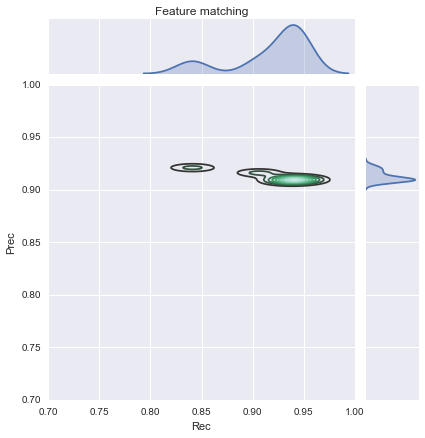

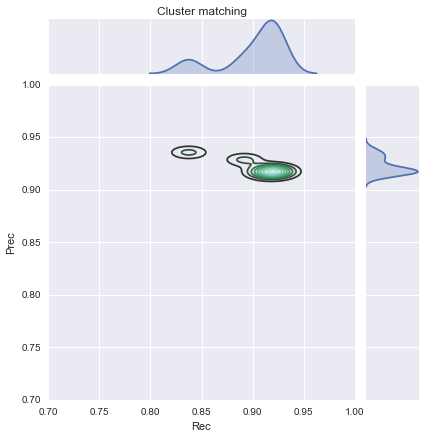

In [36]:
plot_density(exp_results_1a, 'Feature matching')
plot_density(exp_results_1b, 'Cluster matching')

In [37]:
print exp_results_1a

[([(<discretisation.models.PeakData object at 0x7f8ea323a210>, <alignment.adduct_cluster.AdductCluster object at 0x7f8eef87b890>), (<discretisation.models.PeakData object at 0x7f8ea31d0e10>, <alignment.adduct_cluster.AdductCluster object at 0x7f8ebc5f0dd0>), (<discretisation.models.PeakData object at 0x7f8ea31a2910>, <alignment.adduct_cluster.AdductCluster object at 0x7f8ea0983910>)],     mass_tol  rt_tol   TP  FP  FN      Prec       Rec        F1  Threshold
0          2       5  233  20  44  0.920949  0.841155  0.879245          1
1          2      10  251  23  26  0.916058  0.906137  0.911071          1
2          2      15  258  26  19  0.908451  0.931408  0.919786          1
3          2      20  261  26  16  0.909408  0.942238  0.925532          1
4          2      25  261  26  16  0.909408  0.942238  0.925532          1
5          2      30  262  26  15  0.909722  0.945848  0.927434          1
6          4       5  233  20  44  0.920949  0.841155  0.879245          1
7          4

In [38]:
print exp_results_1b

[([(<discretisation.models.PeakData object at 0x7f8ea323a210>, <alignment.adduct_cluster.AdductCluster object at 0x7f8eef87b890>), (<discretisation.models.PeakData object at 0x7f8ea31d0e10>, <alignment.adduct_cluster.AdductCluster object at 0x7f8ebc5f0dd0>), (<discretisation.models.PeakData object at 0x7f8ea31a2910>, <alignment.adduct_cluster.AdductCluster object at 0x7f8ea0983910>)],     mass_tol  rt_tol   TP  FP  FN      Prec       Rec        F1  Threshold
0          2       5  232  16  45  0.935484  0.837545  0.883810          1
1          2      10  247  19  30  0.928571  0.891697  0.909761          1
2          2      15  252  23  25  0.916364  0.909747  0.913043          1
3          2      20  255  23  22  0.917266  0.920578  0.918919          1
4          2      25  255  23  22  0.917266  0.920578  0.918919          1
5          2      30  256  23  21  0.917563  0.924188  0.920863          1
6          4       5  232  16  45  0.935484  0.837545  0.883810          1
7          4

In [39]:
def plot_scatter(exp_res, idx, df, title):
    item = exp_res[idx]
    training_data, training_df, best_training_row, match_res = item
    training_df = training_df.reset_index(drop=True)
    g = sns.JointGrid(x="Rec", y="Prec", data=training_df)
    g = g.plot_joint(plt.scatter, color=".5", edgecolor="white")
    plt.figure(g.fig.number)
    plt.plot(df.Rec, df.Prec, '.r-')    
    # g = g.plot_marginals(sns.distplot, kde=False, color=".5")  
    g = g.plot_marginals(sns.kdeplot, shade=True)
    ax = g.ax_joint
    ax.set_xlabel('Rec')
    ax.set_ylabel('Prec')
    ax.set_ylim([0.7, 1.0])
    ax = g.ax_marg_x
    ax.set_title(title)    

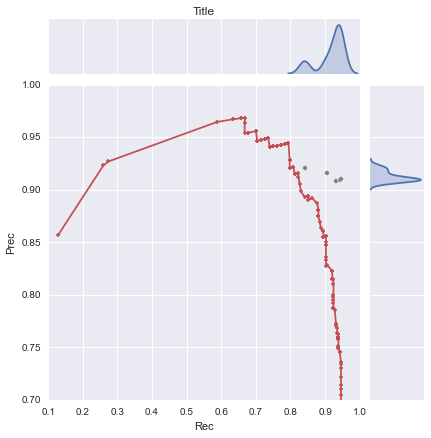

In [40]:
plot_scatter(exp_results_1a, 0, df1, 'Title')

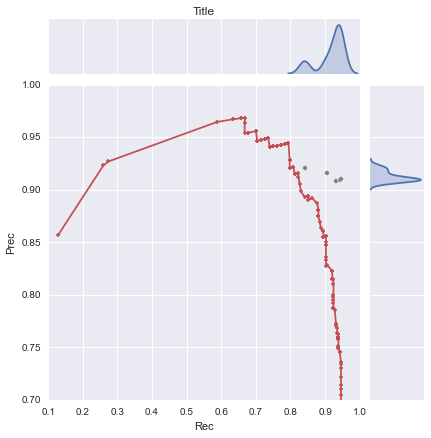

In [41]:
plot_scatter(exp_results_1a, 0, df1, 'Title')